In [1]:
!pip install plotly

In [2]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re

In [3]:
# Load the Excel file
file_path = '/Users/yummy/Desktop/Dataset for DA analysis/Delta Airlines Loyalty Customer Raw Data (Amy).xlsx'
file_path2 = '/Users/yummy/Desktop/Dataset for DA analysis/System Passenger Revenue per Available Seat Mile (PRASM) copy.csv'

# Load the three sheets
frequent_flier_raw = pd.read_excel(file_path, sheet_name='Frequent Flier Raw', header=1) #Adjust the 'header' parameter to row 2 (index 1)
flier_upcoming_flights_raw = pd.read_excel(file_path, sheet_name='Flier Upcoming Flights Raw', header=0)
three_month_upcoming_flights_raw = pd.read_excel(file_path, sheet_name='3 Month Upcoming Flights Raw', header=0)

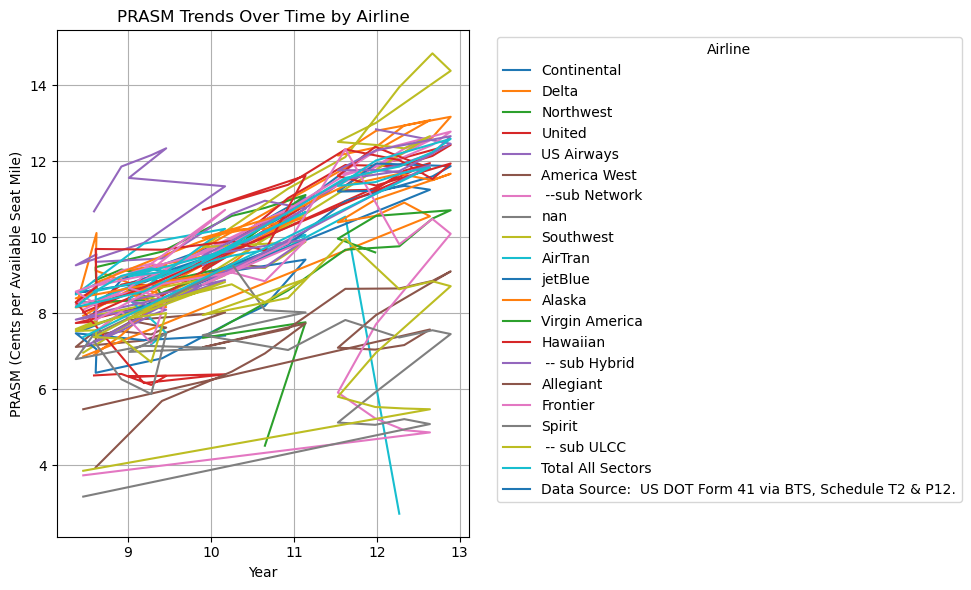

In [7]:
import matplotlib.pyplot as plt

# Skip unnecessary rows to extract the main data and clean up column headers
# We will skip the initial rows with metadata and rename columns based on the year provided in the dataset

# Identify starting row and reset the columns to focus on actual data
prasm_data_cleaned = pd.read_csv(file_path2, skiprows=4)

# Rename columns to make it more understandable and drop any fully empty columns
prasm_data_cleaned.columns = ['Airline'] + list(prasm_data_cleaned.iloc[0, 1:])
prasm_data_cleaned = prasm_data_cleaned.drop(0).reset_index(drop=True)
prasm_data_cleaned = prasm_data_cleaned.dropna(axis=1, how='all')

# Convert dataset from wide format to long format for analysis
prasm_long = pd.melt(prasm_data_cleaned, id_vars=['Airline'], var_name='Year', value_name='PRASM')

# Convert 'Year' and 'PRASM' columns to appropriate data types
prasm_long['Year'] = pd.to_numeric(prasm_long['Year'], errors='coerce')
prasm_long['PRASM'] = pd.to_numeric(prasm_long['PRASM'], errors='coerce')

# Display cleaned dataset structure
prasm_long.head()

# Plot PRASM trends over time for each airline
plt.figure(figsize=(10, 6))
for airline in prasm_long['Airline'].unique():
    airline_data = prasm_long[prasm_long['Airline'] == airline]
    plt.plot(airline_data['Year'], airline_data['PRASM'], label=airline)

plt.title('PRASM Trends Over Time by Airline')
plt.xlabel('Year')
plt.ylabel('PRASM (Cents per Available Seat Mile)')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Display the first few rows to check the data
frequent_flier_raw.head()

In [ ]:
flier_upcoming_flights_raw.head()

In [ ]:
three_month_upcoming_flights_raw.head()

In [2]:
# # Static currency conversion rates 
# # Define a dictionary with the conversion rates
# currency_conversion = {
#     'USD': 1,       # US Dollar
#     'GBP': 1.37,    # British Pound to USD
#     'EUR': 1.16,    # Euro to USD
#     'BRL': 0.18,    # Brazilian Real to USD
#     # Add more currencies as needed
# }


In [ ]:
# # Function to extract currency and numeric values
# def extract_currency_and_amount(value):
#     if isinstance(value, str):
#         # Regex to extract the currency symbol and numeric value
#         currency = re.findall(r'[^\d.,]+', value)  # Extract non-numeric characters (currency symbol)
#         amount = re.sub(r'[^\d.,]', '', value)     # Extract numeric characters (amount)
        
#         # Return currency symbol and numeric value
#         return (currency[0] if currency else 'USD', pd.to_numeric(amount, errors='coerce'))
#     return ('USD', pd.to_numeric(value, errors='coerce'))  # Default to USD if currency symbol not found


In [ ]:
# # Function to convert amounts to USD based on the currency
# def convert_to_usd(amount, currency):
#     if pd.isna(currency) or pd.isna(amount):
#         return amount  # If currency or amount is NaN, return NaN
#     rate = currency_conversion.get(currency, 1)  # Default to 1 if currency not in conversion table
#     return amount * rate

In [8]:

# Define the cleaning function for Frequent Flier Raw sheet
def clean_ffr_data(df):
    # Skip the header row and reset the data start point
#     df = df.iloc[1:].reset_index(drop=True)

    # Rename columns for clarity
    df.columns = [
        'Record Creation', 'Frequent Flier Number', 'Join Date', 'First Name', 'Last Name',
        'Inquiry Type', 'Most Recent Flight #', 'Lounge Used?', 'Departing Airport',
        'Arrival Airport', 'Planned Snack?', 'Additional Snack?', '# of Included Checked Bags',
        'Total # of Checked Bags', 'Flight Delayed?'
    ]
    
    # Convert date columns to DateTime
    df['Record Creation'] = pd.to_datetime(df['Record Creation'], errors='coerce')
    df['Join Date'] = pd.to_datetime(df['Join Date'], errors='coerce')
    
    # Standardize text columns to proper case for consistency
    df['First Name'] = df['First Name'].str.title().fillna('Unknown')
    df['Last Name'] = df['Last Name'].str.title().fillna('Unknown')
    df['Inquiry Type'] = df['Inquiry Type'].str.title().fillna('Unknown')
    df['Departing Airport'] = df['Departing Airport'].str.upper().fillna('UNKNOWN')
    df['Arrival Airport'] = df['Arrival Airport'].str.upper().fillna('UNKNOWN')
    
    # Convert Boolean-like columns and fill blanks with False
    df['Lounge Used?'] = df['Lounge Used?'].fillna(False).astype(bool)
    df['Planned Snack?'] = df['Planned Snack?'].fillna(False).astype(bool)
    df['Additional Snack?'] = df['Additional Snack?'].fillna(False).astype(bool)
    df['Flight Delayed?'] = df['Flight Delayed?'].fillna(False).astype(bool)
    
    # Convert numeric columns, keeping NaN for missing 'Frequent Flier Number' values
    df['Frequent Flier Number'] = pd.to_numeric(df['Frequent Flier Number'], errors='coerce')
    df['# of Included Checked Bags'] = pd.to_numeric(df['# of Included Checked Bags'], errors='coerce').fillna(0)
    df['Total # of Checked Bags'] = pd.to_numeric(df['Total # of Checked Bags'], errors='coerce').fillna(0)
    
    # # Convert numeric columns, filling blanks with 0 where appropriate
    # df['Frequent Flier Number'] = pd.to_numeric(df['Frequent Flier Number'], errors='coerce').fillna(0)
    # df['# of Included Checked Bags'] = pd.to_numeric(df['# of Included Checked Bags'], errors='coerce').fillna(0)
    # df['Total # of Checked Bags'] = pd.to_numeric(df['Total # of Checked Bags'], errors='coerce').fillna(0)

    # Convert numeric columns
#     df['Frequent Flier Number'] = pd.to_numeric(df['Frequent Flier Number'], errors='coerce')
#     df['# of Included Checked Bags'] = pd.to_numeric(df['# of Included Checked Bags'], errors='coerce')
#     df['Total # of Checked Bags'] = pd.to_numeric(df['Total # of Checked Bags'], errors='coerce')
    
    # Drop duplicate rows if any
    df.drop_duplicates(inplace=True)
    
    return df

# Apply the cleaning function
cleaned_ffr_data = clean_ffr_data(frequent_flier_raw)
cleaned_ffr_data.head()


,Record Creation,Frequent Flier Number,Join Date,First Name,Last Name,Inquiry Type,Most Recent Flight #,Lounge Used?,Departing Airport,Arrival Airport,Planned Snack?,Additional Snack?,# of Included Checked Bags,Total # of Checked Bags,Flight Delayed?
0,2024-02-27,7.234618e+09,1988-07-08,Debbie,Spears,Flight Status,G35206241,False,DFW,DEN,False,True,0.0,16.0,True
1,2021-03-07,7.234618e+09,1988-07-08,Debbie,Spears,New Flight,V81311927,True,JFK,SFO,False,True,1.0,21.0,False
2,2023-01-31,7.234618e+09,1988-07-08,Debbie,Spears,Cancel Flight,H82295055,False,MIA,ORD,False,False,7.0,5.0,True
3,2021-08-21,5.511217e+08,2022-06-16,Kyle,Boone,New Flight,E39886834,True,TTT,UNKNOWN,False,True,0.0,8.0,False
4,2022-03-01,5.511217e+08,2022-06-16,Kyle,Boone,New Flight,R04390271,False,SFO,DFW,False,False,3.0,17.0,False


In [6]:

# # 1
# # Function to clean and standardize Frequent_flier_raw sheet
# def clean_frequent_flier(df):
#     # 1. Convert 'Record Creation' to DateTime format (first column) with a specified format
#     df.iloc[1:, 0] = pd.to_datetime(df.iloc[1:, 0], format="%Y-%m-%d", errors='coerce')

#     # 2. Convert 'Frequent Flier' to numeric format (second column)
#     df.iloc[1:, 1] = pd.to_numeric(df.iloc[1:, 1], errors='coerce')

#     # 3. Convert 'Join Date' to DateTime format (third column) with inferred formats
#     df.iloc[1:, 2] = pd.to_datetime(df.iloc[1:, 2], errors='coerce')


#     # 4. Convert 'Departing Airport' and 'Arrival Airport' to uppercase (eighth and ninth columns)
#     df.iloc[1:, 7] = df.iloc[1:, 7].astype(str).fillna('').str.upper()
#     df.iloc[1:, 8] = df.iloc[1:, 8].astype(str).fillna('').str.upper()

#     # 5. Convert 'First Name' and 'Last Name' to proper case (fourth and fifth columns)
#     df.iloc[1:, 3] = df.iloc[1:, 3].astype(str).fillna('').str.title()
#     df.iloc[1:, 4] = df.iloc[1:, 4].astype(str).fillna('').str.title()

#     # 6. Handle duplicate names and rows with missing values
#     df['missing_count'] = df.isnull().sum(axis=1)  # Count missing values per row

#     # Sort by 'First Name', 'Last Name', and 'missing_count'
#     df = df.sort_values(by=[df.columns[3], df.columns[4], 'missing_count'])

#     # Drop duplicates based on 'First Name' and 'Last Name'
#     df = df.drop_duplicates(subset=[df.columns[3], df.columns[4]], keep='first')

#     # Drop the temporary 'missing_count' column
#     df = df.drop(columns=['missing_count'])
    
#     return df

In [9]:
# Perform descriptive analysis/statistics on the cleaned data
ffr_descriptive_stats = cleaned_ffr_data.describe(include='all', datetime_is_numeric=True)

print("Descriptive Statistics:")
print(ffr_descriptive_stats)

Descriptive Statistics:
                      Record Creation  Frequent Flier Number  \
count                            9211           9.140000e+03   
unique                            NaN                    NaN   
top                               NaN                    NaN   
freq                              NaN                    NaN   
mean    2022-11-27 18:19:48.926283776           4.902771e+09   
min               2021-01-01 00:00:00           5.445899e+06   
25%               2021-12-18 00:00:00           2.333756e+09   
50%               2022-11-30 00:00:00           4.852665e+09   
75%               2023-11-10 00:00:00           7.458187e+09   
max               2024-10-15 00:00:00           9.998535e+09   
std                               NaN           2.910566e+09   

                            Join Date First Name Last Name Inquiry Type  \
count                            9137       9672      9672         9672   
unique                            NaN        474       70

In [10]:
# Calculate the correlation matrix for numeric variables
ffr_correlation_matrix = cleaned_ffr_data.corr()

print("\nCorrelation Matrix:")
print(ffr_correlation_matrix)


Correlation Matrix:
                            Frequent Flier Number  Lounge Used?  \
Frequent Flier Number                    1.000000      0.005003   
Lounge Used?                             0.005003      1.000000   
Planned Snack?                          -0.003809      0.005090   
Additional Snack?                       -0.001312      0.000552   
# of Included Checked Bags               0.007901      0.001342   
Total # of Checked Bags                  0.017411     -0.007573   
Flight Delayed?                         -0.005947     -0.004023   

                            Planned Snack?  Additional Snack?  \
Frequent Flier Number            -0.003809          -0.001312   
Lounge Used?                      0.005090           0.000552   
Planned Snack?                    1.000000          -0.007134   
Additional Snack?                -0.007134           1.000000   
# of Included Checked Bags       -0.001733           0.020084   
Total # of Checked Bags           0.014931          

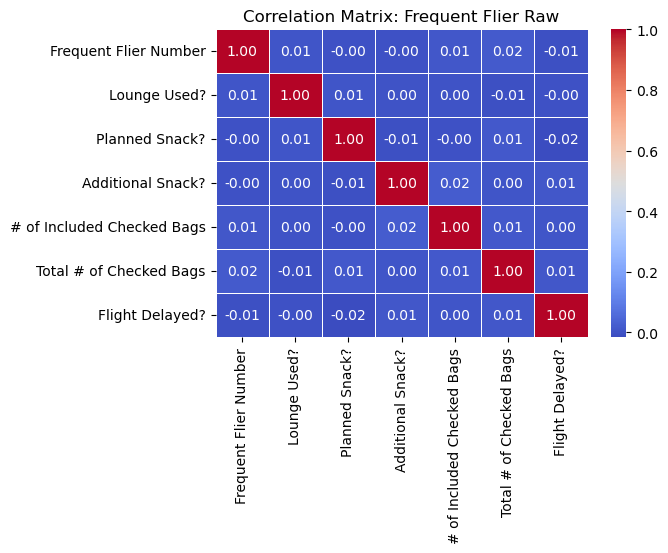

Text(0.5, 1.0, 'Correlation Matrix: Frequent Flier Raw')

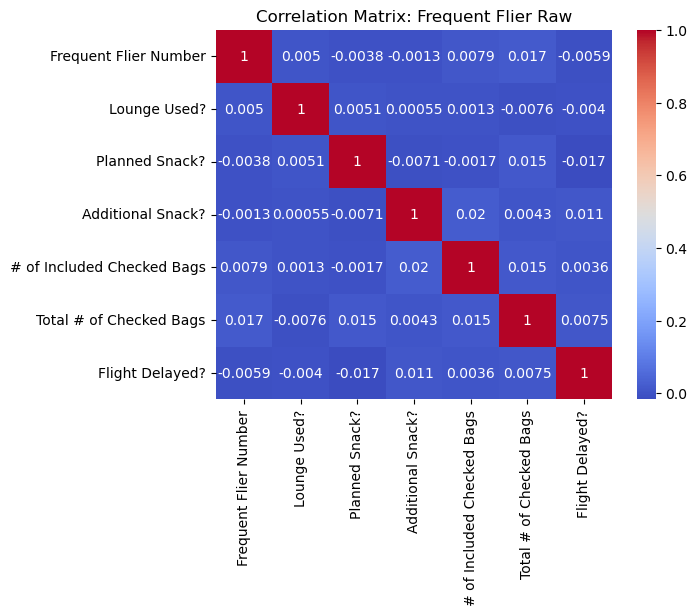

In [11]:

# Plot heatmap of the correlation matrix for Frequent Flier Raw sheet
plt.figure(figsize=(6, 4))
sns.heatmap(ffr_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Frequent Flier Raw")
plt.show()

# Correlation matrix for Frequent Flier Raw
ffr_correlation_matrix = cleaned_ffr_data.corr()
sns.heatmap(ffr_correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix: Frequent Flier Raw')


In [12]:
# Analyze engagement metrics based on 'Frequent Flier Number'

# Calculate frequency of each flier's appearances in the dataset
flier_engagement = cleaned_ffr_data.groupby('Frequent Flier Number').agg({
    'Inquiry Type': 'count',  # Total inquiries made by each flier
    'Lounge Used?': 'sum',  # Total lounge usage
    'Planned Snack?': 'sum',  # Total planned snack usage
    'Additional Snack?': 'sum'  # Total additional snack usage
}).rename(columns={
    'Inquiry Type': 'Total Inquiries',
    'Lounge Used?': 'Lounge Access Count',
    'Planned Snack?': 'Planned Snack Count',
    'Additional Snack?': 'Additional Snack Count'
}).sort_values(by='Total Inquiries', ascending=False)

# Display the engagement metrics
print("Flier Engagement Metrics:")
print(flier_engagement)



Flier Engagement Metrics:
                       Total Inquiries  Lounge Access Count  \
Frequent Flier Number                                         
2.998145e+09                        14                    4   
6.974772e+09                        13                    8   
4.072078e+09                        12                    6   
3.311902e+09                        12                    6   
7.181231e+09                        12                    7   
...                                ...                  ...   
2.023236e+09                         1                    1   
1.636839e+09                         1                    1   
2.571200e+08                         1                    0   
6.090060e+09                         1                    1   
6.389699e+09                         1                    1   

                       Planned Snack Count  Additional Snack Count  
Frequent Flier Number                                               
2.998145e+09    

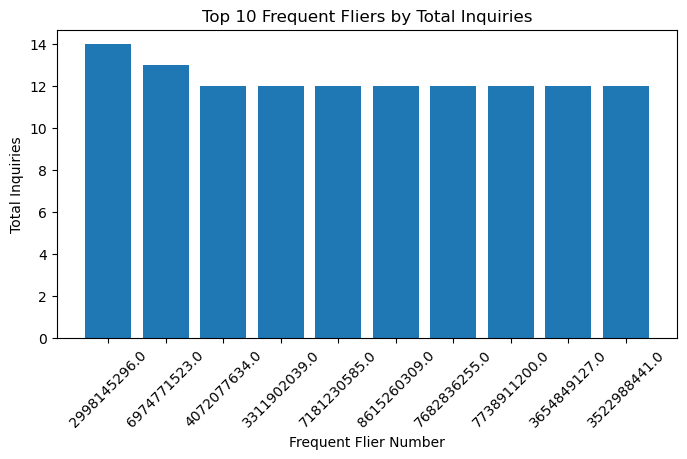

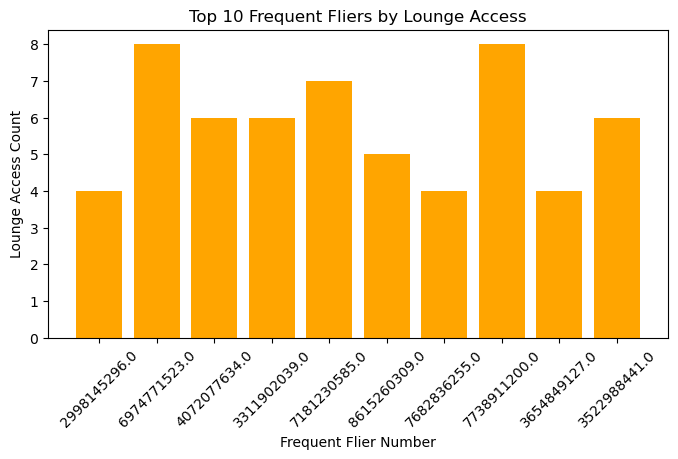

In [13]:

# Visualize engagement metrics for the top 10 frequent fliers based on Total Inquiries
top_fliers = flier_engagement.head(10)

# Plot Total Inquiries per Frequent Flier
plt.figure(figsize=(8, 4))
plt.bar(top_fliers.index.astype(str), top_fliers['Total Inquiries'])
plt.xlabel('Frequent Flier Number')
plt.ylabel('Total Inquiries')
plt.title('Top 10 Frequent Fliers by Total Inquiries')
plt.xticks(rotation=45)
plt.show()

# Plot Lounge Access Count for the top 10 frequent fliers
plt.figure(figsize=(8, 4))
plt.bar(top_fliers.index.astype(str), top_fliers['Lounge Access Count'], color='orange')
plt.xlabel('Frequent Flier Number')
plt.ylabel('Lounge Access Count')
plt.title('Top 10 Frequent Fliers by Lounge Access')
plt.xticks(rotation=45)
plt.show()



In [14]:
# flier_upcoming_flights_raw
fufr_data = pd.read_excel(file_path, sheet_name='Flier Upcoming Flights Raw')

# Define the cleaning function
def clean_fufr_data(df):
    df.columns = [
        'Join Date', 'Frequent Flier Number', 'First Name', 'Last Name', 'Flight Number',
        'Flight Date', 'Departing City', 'Arrival City', 'Departure Time', 'Arrival Time',
        'Departure Time Zone', 'Arrival Time Zone', 'Cost', 'Car Rental Addon', 'Hotel Addon'
    ]
    
    # Convert 'Join Date' and 'Flight Date' to DateTime format
    df['Join Date'] = pd.to_datetime(df['Join Date'], errors='coerce')
    df['Flight Date'] = pd.to_datetime(df['Flight Date'], errors='coerce')
    
    # Standardize text columns
    df['First Name'] = df['First Name'].str.title().fillna('Unknown')
    df['Last Name'] = df['Last Name'].str.title().fillna('Unknown')
    df['Departing City'] = df['Departing City'].str.title().fillna('Unknown')
    df['Arrival City'] = df['Arrival City'].str.title().fillna('Unknown')
    
    # Convert 'Frequent Flier Number' and 'Flight Number' to numeric, with NaNs for missing values
    df['Frequent Flier Number'] = pd.to_numeric(df['Frequent Flier Number'], errors='coerce')
    df['Flight Number'] = pd.to_numeric(df['Flight Number'], errors='coerce')
    
    # Extract numeric values from cost-related columns
    df['Cost'] = df['Cost'].str.extract(r'([\d.]+)').astype(float)
    df['Car Rental Addon'] = df['Car Rental Addon'].str.extract(r'([\d.]+)').astype(float)
    df['Hotel Addon'] = df['Hotel Addon'].str.extract(r'([\d.]+)').astype(float)
    
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)
    
    return df

# Clean the data
cleaned_fufr_data = clean_fufr_data(fufr_data)
cleaned_fufr_data.head()


,Join Date,Frequent Flier Number,First Name,Last Name,Flight Number,Flight Date,Departing City,Arrival City,Departure Time,Arrival Time,Departure Time Zone,Arrival Time Zone,Cost,Car Rental Addon,Hotel Addon
0,2009-10-07,9531726184,Megan,Brown,NaN,2024-11-04,Berlin,Miaml,04:38:00,09:38:00,UTC,CST,998.55,197.50,419.24
1,1996-07-29,7654154528,William,Lee,NaN,2024-11-04,Dubai,Hong Kong,22:38:00,08:38:00,UTC,UTk,283.62,256.04,NaN
2,1990-03-11,1035783281,Courtney,Valdez,NaN,2025-01-03,Houston,Paris,00:38:00,10:38:00,PST,UTC,335.82,117.56,263.57
3,2002-12-16,787669065,Erik,Schneider,NaN,2025-07-21,New York,Miami,23:38:00,10:38:00,EST,PSy,686.64,77.29,197.77
4,NaT,2871854617,Alexander,Johnson,NaN,2025-01-21,Dallas,New York,02:38:00,04:38:00,CST,EST,601.82,161.71,197.69


In [15]:
# Descriptive statistics for Frequent Upcoming Flier Raw
fufr_descriptive_stats = cleaned_fufr_data.describe(include='all', datetime_is_numeric=True)
print("Descriptive Statistics for Flier Upcoming Flights Raw:")
print(fufr_descriptive_stats)

Descriptive Statistics for Flier Upcoming Flights Raw:
                            Join Date  Frequent Flier Number First Name  \
count                           13301           1.507800e+04      15078   
unique                            NaN                    NaN       1114   
top                               NaN                    NaN    Unknown   
freq                              NaN                    NaN        753   
mean    2006-03-21 02:53:06.707766272           4.887256e+09        NaN   
min               1987-09-02 00:00:00           5.445899e+06        NaN   
25%               1997-01-05 00:00:00           2.303248e+09        NaN   
50%               2006-02-01 00:00:00           4.816327e+09        NaN   
75%               2015-09-11 00:00:00           7.469668e+09        NaN   
max               2024-08-27 00:00:00           9.998535e+09        NaN   
std                               NaN           2.915885e+09        NaN   

       Last Name  Flight Number             

                       Frequent Flier Number  Flight Number      Cost  \
Frequent Flier Number               1.000000            NaN -0.000092   
Flight Number                            NaN            NaN       NaN   
Cost                               -0.000092            NaN  1.000000   
Car Rental Addon                    0.004300            NaN -0.015897   
Hotel Addon                         0.003064            NaN  0.011090   

                       Car Rental Addon  Hotel Addon  
Frequent Flier Number          0.004300     0.003064  
Flight Number                       NaN          NaN  
Cost                          -0.015897     0.011090  
Car Rental Addon               1.000000     0.003752  
Hotel Addon                    0.003752     1.000000  


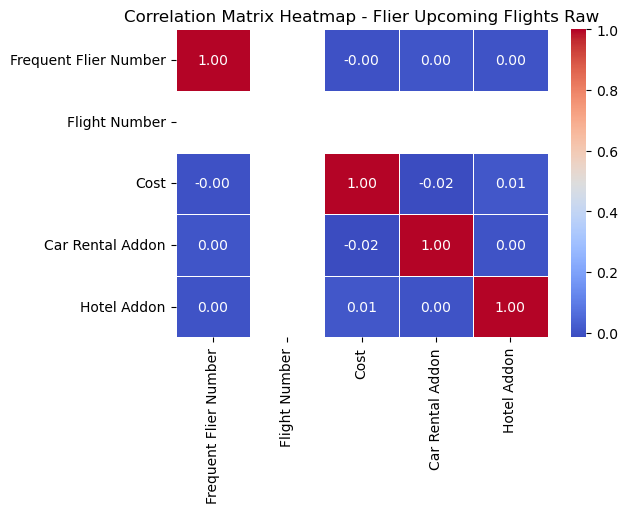

In [16]:

# Select only numeric columns for correlation matrix
numeric_cols = cleaned_fufr_data.select_dtypes(include='number')
fufr_correlation_matrix = numeric_cols.corr()
print(fufr_correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(fufr_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap - Flier Upcoming Flights Raw")
plt.show()



In [7]:
# # 2
# # Function to clean and standardize Flier Upcoming Flights Raw sheet

# # Function to clean and standardize the Flier Upcoming Flights Raw sheet using iloc
# def clean_flier_upcoming_flights(df):
#     # 1. Convert 'Join Date' to DateTime format (first column)
#     df.iloc[1:, 0] = pd.to_datetime(df.iloc[1:, 0], errors='coerce')
    
#     # 2. Convert 'Frequent Flier Number' to numeric format (second column)
#     df.iloc[1:, 1] = pd.to_numeric(df.iloc[1:, 1], errors='coerce')
    
#     # 3. Convert 'Flight Date' to DateTime format (sixth column)
#     df.iloc[1:, 5] = pd.to_datetime(df.iloc[1:, 5], errors='coerce')

#     # 4. Convert 'Flight Number' to numeric format (fifth column)
#     df.iloc[1:, 4] = pd.to_numeric(df.iloc[1:, 4], errors='coerce')

#     # 5. Convert 'Departing City' and 'Arrival City' to proper case (seventh and eighth columns)
#     df.iloc[1:, 6] = df.iloc[1:, 6].astype(str).fillna('').str.title()
#     df.iloc[1:, 7] = df.iloc[1:, 7].astype(str).fillna('').str.title()

#     # 6. Convert 'First Name' and 'Last Name' to proper case (third and fourth columns)
#     df.iloc[1:, 2] = df.iloc[1:, 2].astype(str).fillna('').str.title()
#     df.iloc[1:, 3] = df.iloc[1:, 3].astype(str).fillna('').str.title()

#     # 7. Handle 'Cost', 'Car Rental Addon $', and 'Hotel Addon $' as strings for further processing (12th, 13th, and 14th columns)
#     df.iloc[1:, 11] = df.iloc[1:, 11].astype(str).fillna('')
#     df.iloc[1:, 12] = df.iloc[1:, 12].astype(str).fillna('')
#     df.iloc[1:, 13] = df.iloc[1:, 13].astype(str).fillna('')

#     return df


In [17]:
# 3 Month Upcoming Flights Raw
ufr_data = pd.read_excel(file_path, sheet_name='3 Month Upcoming Flights Raw')


def clean_ufr_data(df):
    df.columns = [
        'Flight_ID', 'Flight Date', 'Departure City', 'Arrival City', 'Departure Time',
        'Arrival Time', 'Departure Time Zone', 'Arrival Time Zone', 'Airline', 'Flight Number',
        'Seat Class', 'Price', 'Currency', 'Available Seats', 'Baggage Allowance',
        'Flight Duration', 'Layovers', 'Cancellation Policy', 'Booking Window', 'Meal Options',
        'In-Flight Entertainment', 'Aircraft Type', 'Flight Status', 'Loyalty Points Earned'
    ]
    
    # Convert 'Flight Date' to DateTime format
    df['Flight Date'] = pd.to_datetime(df['Flight Date'], errors='coerce')
    
    # Text standardization
    text_cols = ['Departure City', 'Arrival City', 'Airline', 'Seat Class', 'Cancellation Policy',
                 'Booking Window', 'Meal Options', 'In-Flight Entertainment', 'Aircraft Type', 'Flight Status']
    for col in text_cols:
        df[col] = df[col].str.title().fillna('Unknown')
    
    # Preserve original values for numeric columns, checking for mixed types
    numeric_cols = ['Flight Number', 'Price', 'Available Seats', 'Baggage Allowance', 'Flight Duration', 'Layovers', 'Loyalty Points Earned']
    for col in numeric_cols:
        # Try to convert to numeric if values are consistent, otherwise keep as is
        df[col] = pd.to_numeric(df[col], errors='ignore')
    
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)
    
    return df

# Apply cleaning function
cleaned_ufr_data = clean_ufr_data(ufr_data)
cleaned_ufr_data.head()

# # Check data types and counts of NaNs
# print(cleaned_ufr_data.info())


,Flight_ID,Flight Date,Departure City,Arrival City,Departure Time,Arrival Time,Departure Time Zone,Arrival Time Zone,Airline,Flight Number,...,Baggage Allowance,Flight Duration,Layovers,Cancellation Policy,Booking Window,Meal Options,In-Flight Entertainment,Aircraft Type,Flight Status,Loyalty Points Earned
0,FL22499,2024-09-11,Dallas,Berlin,22:4j,01:46:00,NaN,UTC,Delta,Un5086,...,2 bags,8 hours,NaN,Refundable,6 Days,Gluten-Free,Movies,Airbus A380,On Time,2274
1,FL62773,2024-11-06,Sydney,Hong Kong,05:46:00,12:46:00,UTC,UTC,Lufthansa,Qa2994,...,2 bags,6 hours,Toronto for 3 hours,Refundable,9 Days,Non-Vegetarian,Movies,Boeing 787,On Time,4337
2,FL96338,2024-09-12,Los Angeleu,Atlanta,06:46:00,17:46:00,PST,MST,Lufthansa,Em9455,...,2 bags,15 hourj,NaN,Non-Refundable,18 Days,Gluten-Free,None,Airbus A380,Delayed,164
3,FL85371,2024-09-20,San Francisco,Tokyo,07:46:00,13:4l,UTC,UTC,British Airways,Br6054,...,1 bags,15 hours,NaN,Unknown,19 Days,Non-Vegetarian,Movies,Airbus A320,Delayed,2711
4,FL65244,2024-10-02,Miami,San Francisco,10:46:00,20:46:00,PST,UTC,Air Canada,Br3533,...,3 bags,9 hours,Hong Kong for 5 hours,Non-Refundable,10 Days,Non-Vegetarian,Movies,Airbus A320,Scheduled,2451


In [18]:
# Perform descriptive statistics on the cleaned data
ufr_descriptive_stats = cleaned_ufr_data.describe(include='all', datetime_is_numeric=True)
print("Descriptive Statistics for 3 Months Upcoming Flights Raw:")
print(ufr_descriptive_stats)


Descriptive Statistics for 3 Months Upcoming Flights Raw:
       Flight_ID                    Flight Date   Departure City Arrival City  \
count      20000                          18090            20000        20000   
unique     18167                            NaN              461          442   
top      FL93325                            NaN  Washington D.C.      Unknown   
freq           4                            NaN              990         1000   
mean         NaN  2024-10-09 09:13:04.477611776              NaN          NaN   
min          NaN            2024-09-01 00:00:00              NaN          NaN   
25%          NaN            2024-09-24 00:00:00              NaN          NaN   
50%          NaN            2024-10-09 00:00:00              NaN          NaN   
75%          NaN            2024-10-25 00:00:00              NaN          NaN   
max          NaN            2024-11-08 00:00:00              NaN          NaN   
std          NaN                            NaN    

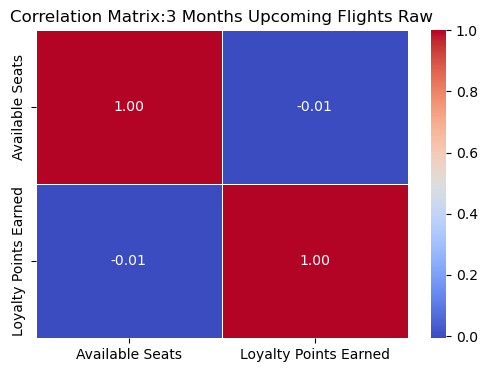

In [15]:
# Calculate the correlation matrix for numeric variables
numeric_cols_ufr = cleaned_ufr_data.select_dtypes(include='number')
ufr_correlation_matrix = numeric_cols_ufr.corr()

# Plot heatmap for the correlation matrix

plt.figure(figsize=(6, 4))
sns.heatmap(ufr_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix:3 Months Upcoming Flights Raw")
plt.show()

# Output the correlation matrix directly
#print(ufr_correlation_matrix)



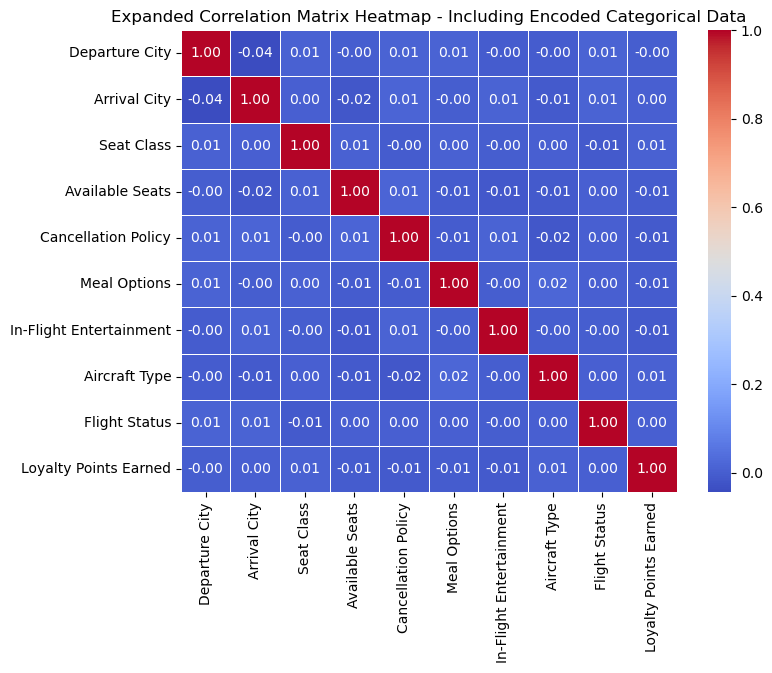

,Departure City,Arrival City,Seat Class,Available Seats,Cancellation Policy,Meal Options,In-Flight Entertainment,Aircraft Type,Flight Status,Loyalty Points Earned
Departure City,1.000000,-0.044376,0.005895,-0.002665,0.012337,0.011342,-0.004046,-0.004894,0.008677,-0.001787
Arrival City,-0.044376,1.000000,0.002544,-0.016308,0.014533,-0.001946,0.011783,-0.007862,0.009312,0.002283
Seat Class,0.005895,0.002544,1.000000,0.006707,-0.004355,0.004962,-0.002575,0.003777,-0.010792,0.005124
Available Seats,-0.002665,-0.016308,0.006707,1.000000,0.014107,-0.005425,-0.013586,-0.011225,0.003715,-0.007616
Cancellation Policy,0.012337,0.014533,-0.004355,0.014107,1.000000,-0.007116,0.012738,-0.016289,0.001178,-0.009844
Meal Options,0.011342,-0.001946,0.004962,-0.005425,-0.007116,1.000000,-0.003033,0.017268,0.001981,-0.006174
In-Flight Entertainment,-0.004046,0.011783,-0.002575,-0.013586,0.012738,-0.003033,1.000000,-0.000960,-0.003207,-0.009028
Aircraft Type,-0.004894,-0.007862,0.003777,-0.011225,-0.016289,0.017268,-0.000960,1.000000,0.004067,0.006134
Flight Status,0.008677,0.009312,-0.010792,0.003715,0.001178,0.001981,-0.003207,0.004067,1.000000,0.001526
Loyalty Points Earned,-0.001787,0.002283,0.005124,-0.007616,-0.009844,-0.006174,-0.009028,0.006134,0.001526,1.000000


In [19]:
# Reviewing the original data for any possible correlations by re-encoding certain columns and checking for patterns

# Reloading the original dataset for 3 Months Upcoming Flights Raw sheet
ufr_data_original = pd.read_excel(file_path, sheet_name='3 Month Upcoming Flights Raw')

# Encoding additional categorical columns that may yield insights when checked against each other
# Using a flexible approach to see if categorical data can yield any patterns
ufr_data_transformed = ufr_data_original.copy()

# Encoding various categorical columns to explore any hidden patterns or correlations
categorical_cols = ['Seat Class', 'Flight Status', 'Departure City', 'Arrival City', 'Cancellation Policy', 'Meal Options', 'In-Flight Entertainment', 'Aircraft Type']
for col in categorical_cols:
    ufr_data_transformed[col] = ufr_data_transformed[col].astype('category').cat.codes

# Selecting all columns, now including encoded categorical columns
ufr_correlation_matrix_expanded = ufr_data_transformed.corr()

# Plotting heatmap to visualize correlations after encoding additional data points
plt.figure(figsize=(8, 6))
sns.heatmap(ufr_correlation_matrix_expanded, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Expanded Correlation Matrix Heatmap - Including Encoded Categorical Data")
plt.show()

# Output the expanded correlation matrix to examine directly
ufr_correlation_matrix_expanded


In [8]:
# # 3
# # Function to clean and standardize 3 Month Upcoming Flights Raw sheet
# def clean_three_month_flights(df):
#     # 1. Convert 'Flight Date' to DateTime format (second column)
#     df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1], errors='coerce')

#     # 2. Convert 'Departure City' and 'Arrival City' to proper case (third and fourth columns)
#     df.iloc[:, 2] = df.iloc[:, 2].astype(str).fillna('').str.title()
#     df.iloc[:, 3] = df.iloc[:, 3].astype(str).fillna('').str.title()

#     # 3. Convert 'Flight Number' to numeric (fifth column)
#     df.iloc[:, 8] = pd.to_numeric(df.iloc[:, 8], errors='coerce')

#     # # 4. Convert 'Price' to numeric (sixth column)
#     # df.iloc[:, 11] = pd.to_numeric(df.iloc[:, 11], errors='coerce')

#     # Clean other fields (Cancellation Policy, Loyalty Points Earned)
#     df.iloc[:, 16] = df.iloc[:, 16].astype(str).fillna('').str.title()
    
#     # Handle missing values and duplicates if necessary
#     df['missing_count'] = df.isnull().sum(axis=1)
#     df = df.sort_values(by=[df.columns[2], df.columns[3], 'missing_count'])
#     df = df.drop_duplicates(subset=[df.columns[2], df.columns[3]], keep='first')
#     df = df.drop(columns=['missing_count'])
    
#     return df

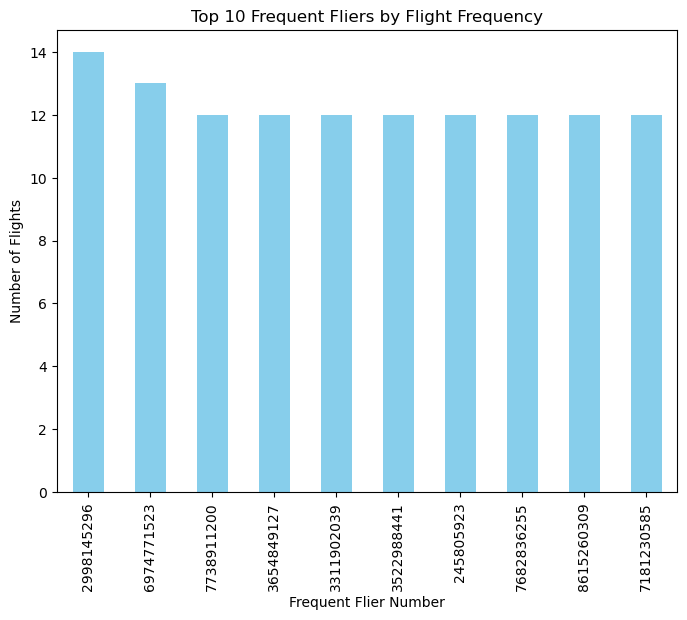

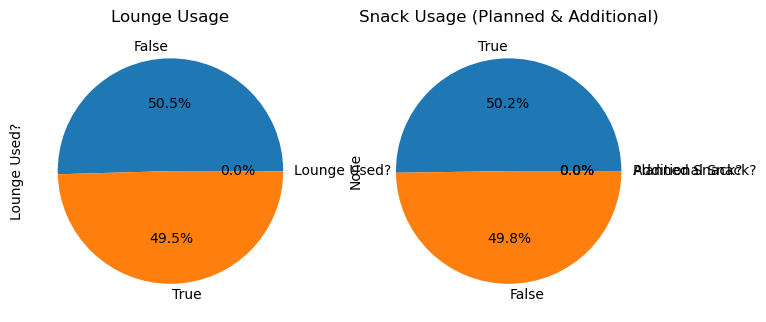

In [20]:

ffr_data = pd.read_excel(file_path, sheet_name='Frequent Flier Raw')

# Correct column names after data cleaning
ffr_data.columns = [
    'Record Creation', 'Frequent Flier Number', 'Join Date', 'First Name', 'Last Name',
    'Inquiry Type', 'Most Recent Flight #', 'Lounge Used?', 'Departing Airport',
    'Arrival Airport', 'Planned Snack?', 'Additional Snack?', '# of Included Checked Bags',
    'Total # of Checked Bags', 'Flight Delayed?'
]

# Aggregating flight frequency per frequent flier
flight_frequency = ffr_data['Frequent Flier Number'].value_counts()

# Aggregating lounge and snack usage
lounge_usage = ffr_data['Lounge Used?'].value_counts()
snack_usage = ffr_data[['Planned Snack?', 'Additional Snack?']].apply(pd.Series.value_counts)

# Visualize flight frequency (Top 10 frequent fliers)
plt.figure(figsize=(8, 6))
flight_frequency.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Frequent Fliers by Flight Frequency")
plt.xlabel("Frequent Flier Number")
plt.ylabel("Number of Flights")
plt.show()

# Visualize lounge and snack usage
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
lounge_usage.plot(kind='pie', autopct='%1.1f%%', ax=axs[0], title="Lounge Usage")
snack_usage.sum(axis=1).plot(kind='pie', autopct='%1.1f%%', ax=axs[1], title="Snack Usage (Planned & Additional)")
plt.show()



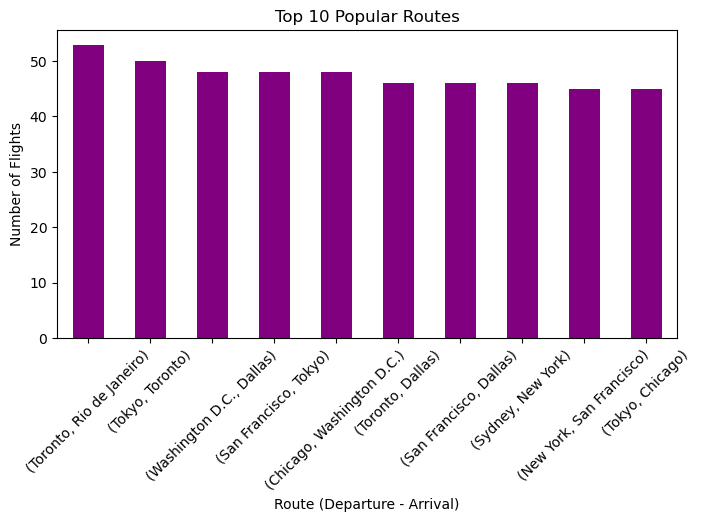

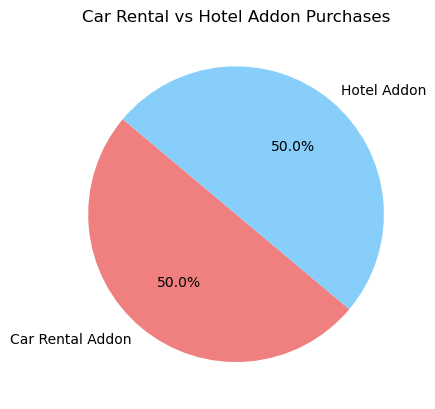

In [21]:

# Load data for Flier Upcoming Flights Raw (assuming cleaned dataset format)
fufr_data = pd.read_excel(file_path, sheet_name='Flier Upcoming Flights Raw')

# Correct column names as per cleaned data
fufr_data.columns = [
    'Join Date', 'Frequent Flier Number', 'First Name', 'Last Name', 'Flight Number',
    'Flight Date', 'Departing City', 'Arrival City', 'Departure Time', 'Arrival Time',
    'Departure Time Zone', 'Arrival Time Zone', 'Cost', 'Car Rental Addon', 'Hotel Addon'
]

# Calculate popular routes
popular_routes = fufr_data.groupby(['Departing City', 'Arrival City']).size().sort_values(ascending=False).head(10)

# Summarize car rental and hotel addon purchases
addon_summary = fufr_data[['Car Rental Addon', 'Hotel Addon']].notna().sum()

# Visualize popular routes
plt.figure(figsize=(8, 4))
popular_routes.plot(kind='bar', color='purple')
plt.title("Top 10 Popular Routes")
plt.xlabel("Route (Departure - Arrival)")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()

# Visualize add-on summary
addon_summary.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)
plt.title("Car Rental vs Hotel Addon Purchases")
plt.ylabel("")
plt.show()


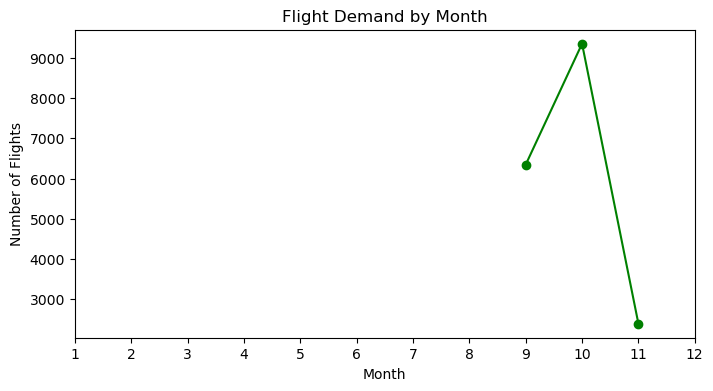

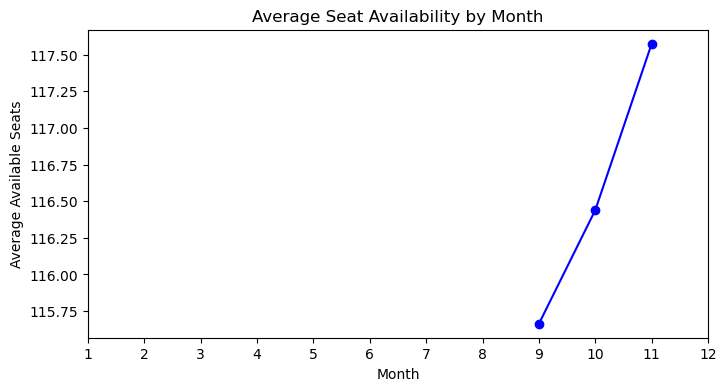

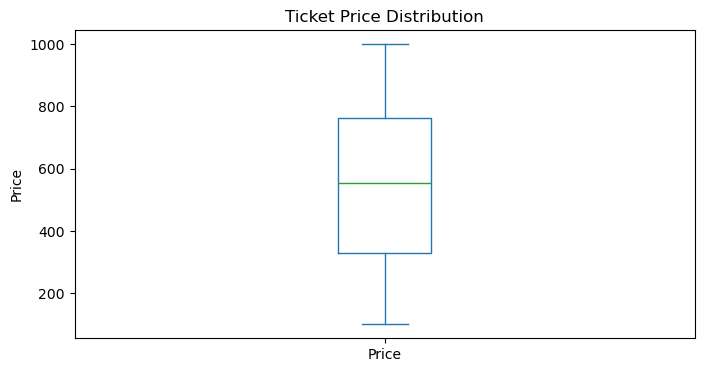

In [22]:
# Load data
ufr_data = pd.read_excel(file_path, sheet_name='3 Month Upcoming Flights Raw')

# Convert Flight Date to DateTime and extract month
ufr_data['Flight Date'] = pd.to_datetime(ufr_data['Flight Date'], errors='coerce')
ufr_data['Month'] = ufr_data['Flight Date'].dt.month

# Demand pattern by month
monthly_demand = ufr_data['Month'].value_counts().sort_index()

# Average seat availability by month
monthly_seat_availability = ufr_data.groupby('Month')['Available Seats'].mean()

# Visualize monthly demand
plt.figure(figsize=(8, 4))
monthly_demand.plot(kind='line', marker='o', color='green')
plt.title("Flight Demand by Month")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(range(1, 13))
plt.show()

# Visualize average seat availability
plt.figure(figsize=(8, 4))
monthly_seat_availability.plot(kind='line', marker='o', color='blue')
plt.title("Average Seat Availability by Month")
plt.xlabel("Month")
plt.ylabel("Average Available Seats")
plt.xticks(range(1, 13))
plt.show()

# Price distribution (boxplot)
#####
# Convert the Price column to numeric, coercing errors to handle any non-numeric values
ufr_data['Price'] = pd.to_numeric(ufr_data['Price'], errors='coerce')

# Now plot the boxplot for Price after ensuring it's numeric
plt.figure(figsize=(8, 4))
ufr_data['Price'].plot(kind='box')
plt.title("Ticket Price Distribution")
plt.ylabel("Price")
plt.show()



In [25]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [23]:
# Load and prepare Delta Airlines loyalty customer data (3 Month Upcoming Flights)
# delta_data_path = '/mnt/data/Delta Airlines Loyalty Customer Raw Data (Amy).xlsx'
ufr_data = pd.read_excel(file_path, sheet_name='3 Month Upcoming Flights Raw')
# delta_3_month_data = pd.read_excel(delta_data_path, sheet_name='3 Month Upcoming Flights Raw')

# Convert 'Flight Date' to datetime format for seasonal analysis and extract month and season
ufr_data['Flight Date'] = pd.to_datetime(ufr_data['Flight Date'], errors='coerce')
ufr_data['Month'] = ufr_data['Flight Date'].dt.month

# Define seasons by month for segmentation
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}
ufr_data['Season'] = ufr_data['Month'].map(season_mapping)

# Filter relevant columns and ensure 'Price' and 'Available Seats' are numeric
ufr_data['Price'] = pd.to_numeric(ufr_data['Price'], errors='coerce')
ufr_data['Available Seats'] = pd.to_numeric(ufr_data['Available Seats'], errors='coerce')

# Group by 'Season' and calculate average price and occupancy
seasonal_summary = ufr_data.groupby('Season').agg(
    avg_price=('Price', 'mean'),
    avg_available_seats=('Available Seats', 'mean')
).reset_index()

# import ace_tools as tools; tools.display_dataframe_to_user(name="Seasonal Demand Summary", dataframe=seasonal_summary)

# Display seasonal summary for occupancy and pricing insights
seasonal_summary
seasonal_summary.head()


,Season,avg_price,avg_available_seats
0,Fall,554.093301,116.316947


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Filter the data to use only the Fall season data for model training
fall_data = ufr_data[ufr_data['Season'] == 'Fall'].dropna(subset=['Price', 'Available Seats'])

# Define features (X) and target variable (y)
# Here we will use 'Available Seats' as a proxy for occupancy and predict it based on 'Price' (avg_price per flight)
X = fall_data[['Price']]
y = fall_data['Available Seats']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2, model.coef_, model.intercept_





(6708.865994865421,
 0.029353405212928396,
 array([0.04287065]),
 97.70582141370349)

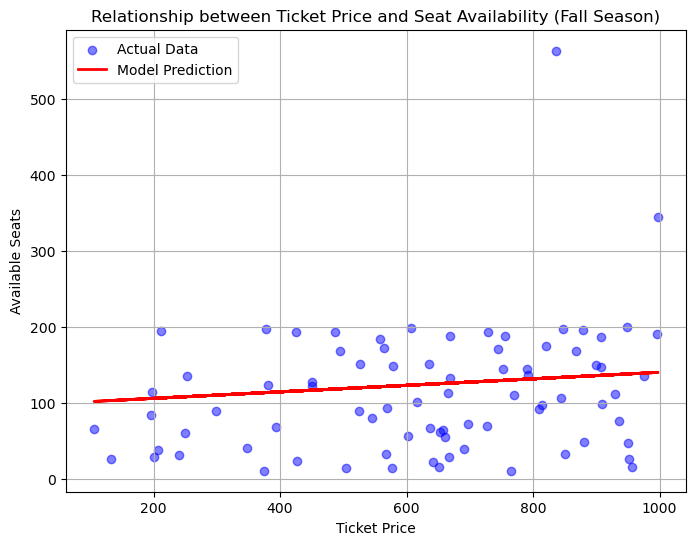

In [27]:
import matplotlib.pyplot as plt

# Plot the relationship between Price and Available Seats with the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual Data", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Model Prediction")

# Adding title and labels
plt.title("Relationship between Ticket Price and Seat Availability (Fall Season)")
plt.xlabel("Ticket Price")
plt.ylabel("Available Seats")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Calculate the occupancy rate for each flight in the Fall season
# Assuming 'Available Seats' and a hypothetical total seat count per flight (e.g., 150 seats)
total_seats = 150  # Hypothetical total seats per flight for occupancy calculation

# Add an occupancy rate column based on available seats and total seats
fall_data['Occupancy Rate'] = (total_seats - fall_data['Available Seats']) / total_seats

# Perform a correlation test to assess the relationship between ticket price and occupancy rate
correlation = fall_data[['Price', 'Occupancy Rate']].corr().iloc[0, 1]

fall_data_summary = fall_data[['Price', 'Occupancy Rate']].describe()
correlation, fall_data_summary


(-0.1232904599432462,
             Price  Occupancy Rate
 count  396.000000      396.000000
 mean   555.070707        0.205034
 std    264.135888        0.686347
 min    101.000000       -5.513333
 25%    332.250000       -0.093333
 50%    558.500000        0.283333
 75%    770.000000        0.610000
 max    999.000000        0.933333)

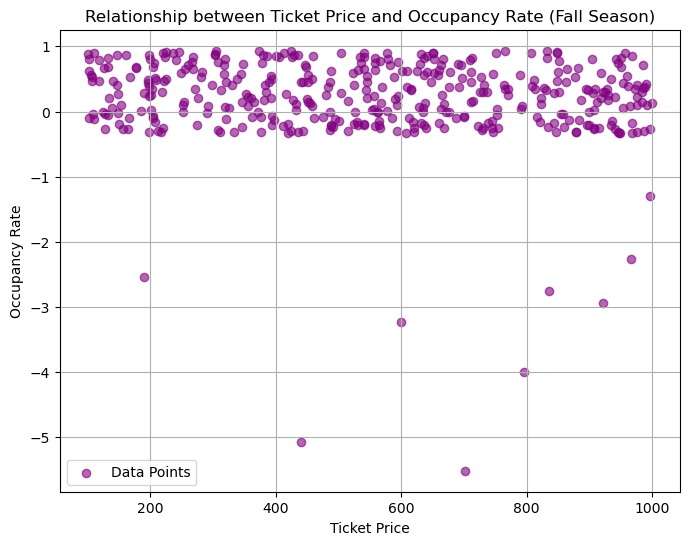

In [30]:
# Plot the relationship between Ticket Price and Occupancy Rate for the Fall season
plt.figure(figsize=(8, 6))
plt.scatter(fall_data['Price'], fall_data['Occupancy Rate'], color="purple", label="Data Points", alpha=0.6)
plt.title("Relationship between Ticket Price and Occupancy Rate (Fall Season)")
plt.xlabel("Ticket Price")
plt.ylabel("Occupancy Rate")
plt.grid(True)
plt.legend()
plt.show()


Logistic Regression Accuracy: 0.5223983459682977
Confusion Matrix:
 [[ 158 1386]
 [   0 1358]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.19      1544
           1       0.49      1.00      0.66      1358

    accuracy                           0.52      2902
   macro avg       0.75      0.55      0.42      2902
weighted avg       0.76      0.52      0.41      2902

ROC AUC Score: 1.0


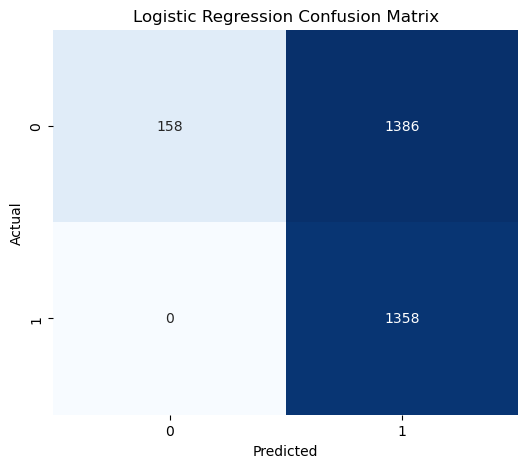

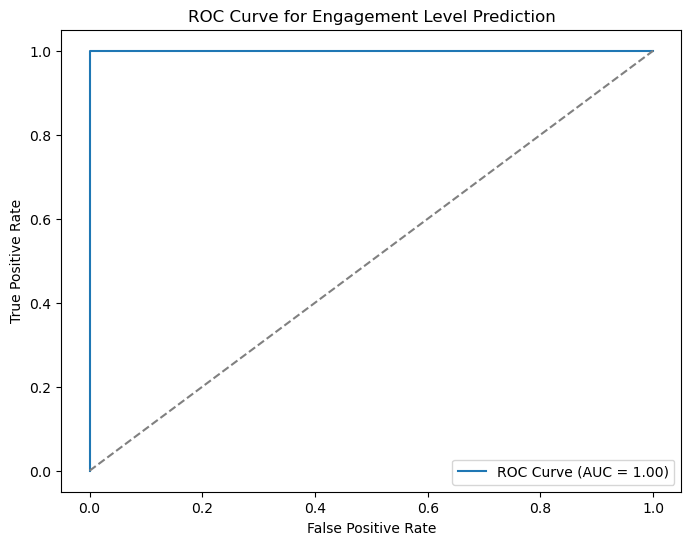

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Frequent Flier Raw (FFR) dataset
# file_path = '/mnt/data/Delta Airlines Loyalty Customer Raw Data (Amy).xlsx'
ffr_data = pd.read_excel(file_path, sheet_name='Frequent Flier Raw', skiprows=1)

# Check column names to confirm consistency with the previous cleaning steps
#print(ffr_data.columns)

# Hypothetically define 'Engagement Level' based on 'Frequent Flier Number' frequency
median_frequency = ffr_data['Frequent Flier Number'].median()
ffr_data['Engagement Level'] = (ffr_data['Frequent Flier Number'] > median_frequency).astype(int)

# Define features and target variable for modeling
X = ffr_data[['Frequent Flier Number']].fillna(0)
y = ffr_data['Engagement Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Output model evaluation metrics
print(f"Logistic Regression Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"ROC AUC Score: {roc_auc}")

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Engagement Level Prediction")
plt.legend()
plt.show()



Decision Tree Model Accuracy: 0.5113333333333333
Confusion Matrix:
 [[1826 1331]
 [1601 1242]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.58      0.55      3157
           1       0.48      0.44      0.46      2843

    accuracy                           0.51      6000
   macro avg       0.51      0.51      0.51      6000
weighted avg       0.51      0.51      0.51      6000

ROC AUC Score: 0.5094854786180507


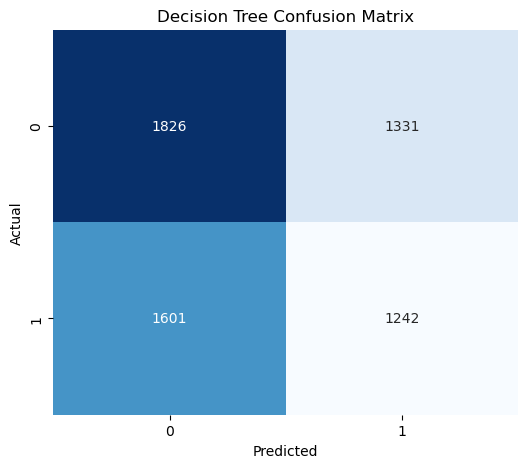

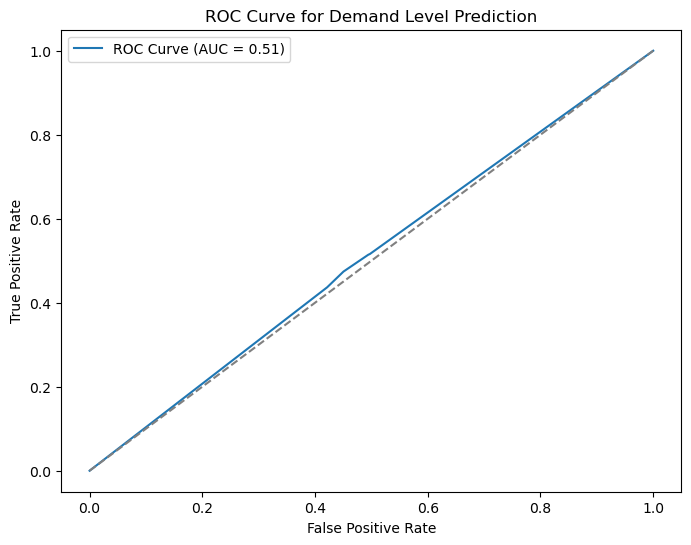

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned UFR data
# file_path = '/mnt/data/Delta Airlines Loyalty Customer Raw Data (Amy).xlsx'
ufr_data = pd.read_excel(file_path, sheet_name='3 Month Upcoming Flights Raw', skiprows=1)

# Naming conventions applied previously for UFR
ufr_data.columns = [
    'Flight_ID', 'Flight Date', 'Departure City', 'Arrival City', 'Departure Time',
    'Arrival Time', 'Departure Time Zone', 'Arrival Time Zone', 'Airline', 'Flight Number',
    'Seat Class', 'Price', 'Currency', 'Available Seats', 'Baggage Allowance',
    'Flight Duration', 'Layovers', 'Cancellation Policy', 'Booking Window', 'Meal Options',
    'In-Flight Entertainment', 'Aircraft Type', 'Flight Status', 'Loyalty Points Earned'
]

# Convert 'Flight Date' to DateTime and create 'Low Demand' feature based on specific months
ufr_data['Flight Date'] = pd.to_datetime(ufr_data['Flight Date'], errors='coerce')
ufr_data['Month'] = ufr_data['Flight Date'].dt.month
ufr_data['Low Demand'] = np.where(ufr_data['Month'].isin([1, 2, 11, 12]), 1, 0)

# Define Demand Level based on 'Available Seats' (e.g., above median seats = low demand)
median_seats = ufr_data['Available Seats'].median()
ufr_data['Demand Level'] = (ufr_data['Available Seats'] > median_seats).astype(int)

# Clean 'Price' by removing non-numeric characters and converting to numeric
ufr_data['Price'] = pd.to_numeric(ufr_data['Price'].replace(r'[^\d.]', '', regex=True), errors='coerce')

# Define features and target variable
X = ufr_data[['Low Demand', 'Price']].fillna(0)  # Using Price and Low Demand as features
y = ufr_data['Demand Level']  # Target: 1 for low demand, 0 for high demand

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Decision Tree Model Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"ROC AUC Score: {roc_auc}")

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Demand Level Prediction")
plt.legend()
plt.show()


Logistic Regression Model Accuracy: 0.5261666666666667
Confusion Matrix:
 [[3157    0]
 [2843    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      3157
           1       0.00      0.00      0.00      2843

    accuracy                           0.53      6000
   macro avg       0.26      0.50      0.34      6000
weighted avg       0.28      0.53      0.36      6000

ROC AUC Score: 0.4983531006196861


/Users/yummy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yummy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yummy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


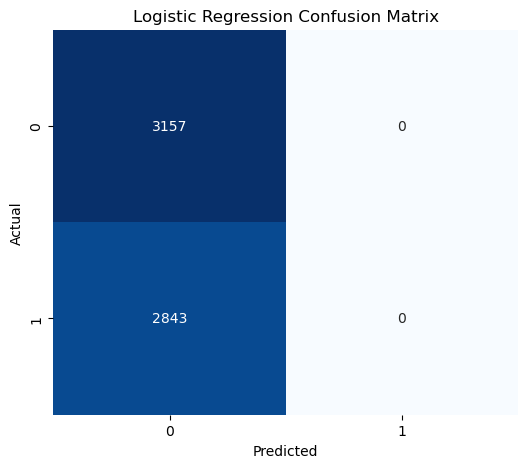

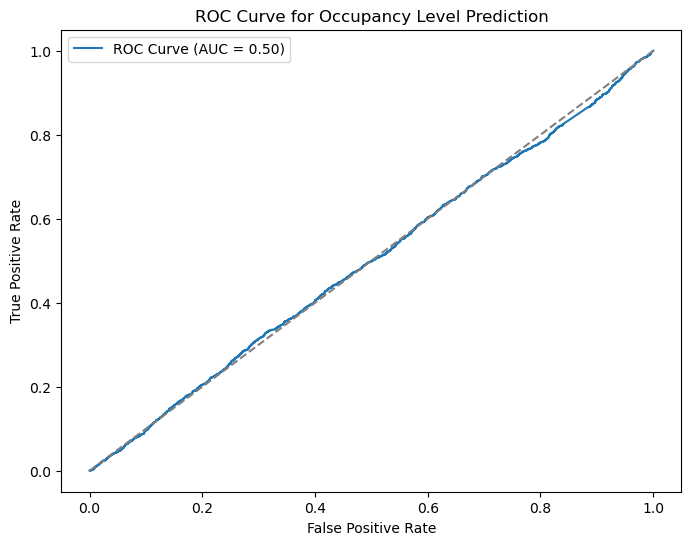

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned UFR data
# file_path = '/mnt/data/Delta Airlines Loyalty Customer Raw Data (Amy).xlsx'
ufr_data = pd.read_excel(file_path, sheet_name='3 Month Upcoming Flights Raw', skiprows=1)

# Apply column naming conventions
ufr_data.columns = [
    'Flight_ID', 'Flight Date', 'Departure City', 'Arrival City', 'Departure Time',
    'Arrival Time', 'Departure Time Zone', 'Arrival Time Zone', 'Airline', 'Flight Number',
    'Seat Class', 'Price', 'Currency', 'Available Seats', 'Baggage Allowance',
    'Flight Duration', 'Layovers', 'Cancellation Policy', 'Booking Window', 'Meal Options',
    'In-Flight Entertainment', 'Aircraft Type', 'Flight Status', 'Loyalty Points Earned'
]

# Convert 'Flight Date' to DateTime and create 'Low Demand' feature based on specific months
ufr_data['Flight Date'] = pd.to_datetime(ufr_data['Flight Date'], errors='coerce')
ufr_data['Month'] = ufr_data['Flight Date'].dt.month
ufr_data['Low Demand'] = np.where(ufr_data['Month'].isin([1, 2, 11, 12]), 1, 0)

# Define Occupancy Level based on 'Available Seats' (e.g., above median seats = low occupancy)
median_seats = ufr_data['Available Seats'].median()
ufr_data['Occupancy Level'] = (ufr_data['Available Seats'] > median_seats).astype(int)

# Clean 'Price' by removing non-numeric characters and converting to numeric
ufr_data['Price'] = pd.to_numeric(ufr_data['Price'].replace(r'[^\d.]', '', regex=True), errors='coerce')

# Define features and target variable
X = ufr_data[['Low Demand', 'Price']].fillna(0)  # Using Price and Low Demand as features
y = ufr_data['Occupancy Level']  # Target: 1 for low occupancy, 0 for high occupancy

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display model evaluation metrics
print(f"Logistic Regression Model Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"ROC AUC Score: {roc_auc}")

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Occupancy Level Prediction")
plt.legend()
plt.show()


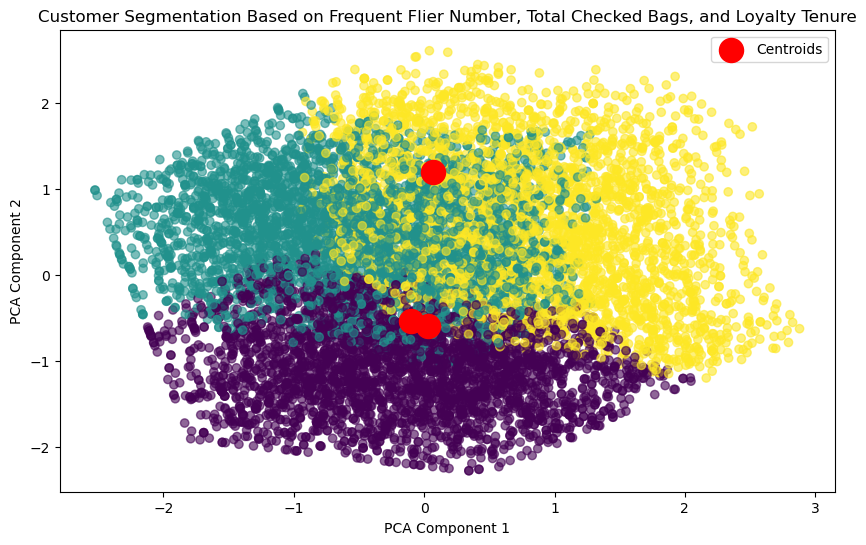

1    3401
0    3168
2    3103
Name: Cluster, dtype: int64

In [26]:
# Re-import necessary libraries and re-run the entire process for consistency
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Frequent Flier Raw (FFR) data
# file_path = '/mnt/data/Delta Airlines Loyalty Customer Raw Data (Amy).xlsx'
ffr_data = pd.read_excel(file_path, sheet_name='Frequent Flier Raw', skiprows=1)

# Calculate Loyalty Tenure from Join Date
ffr_data['Join Date'] = pd.to_datetime(ffr_data['Join Date'], errors='coerce')
ffr_data['Loyalty Tenure'] = (pd.Timestamp('today') - ffr_data['Join Date']).dt.days / 365.25

# Select features for clustering
features = ffr_data[['Frequent Flier Number', 'Total # of Checked Bags', 'Loyalty Tenure']].fillna(0)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction to visualize clusters
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Perform K-Means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster information to the dataset for analysis
ffr_data['Cluster'] = clusters

# Plot the clusters using PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation Based on Frequent Flier Number, Total Checked Bags, and Loyalty Tenure')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Show the count of customers in each cluster for analysis
ffr_data['Cluster'].value_counts()


Logistic Regression Model Accuracy: 0.5223983459682977
Confusion Matrix:
 [[ 158 1386]
 [   0 1358]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.19      1544
           1       0.49      1.00      0.66      1358

    accuracy                           0.52      2902
   macro avg       0.75      0.55      0.42      2902
weighted avg       0.76      0.52      0.41      2902

ROC AUC Score: 1.0


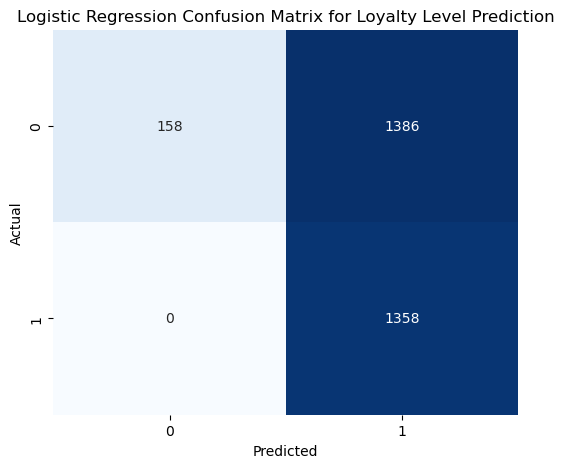

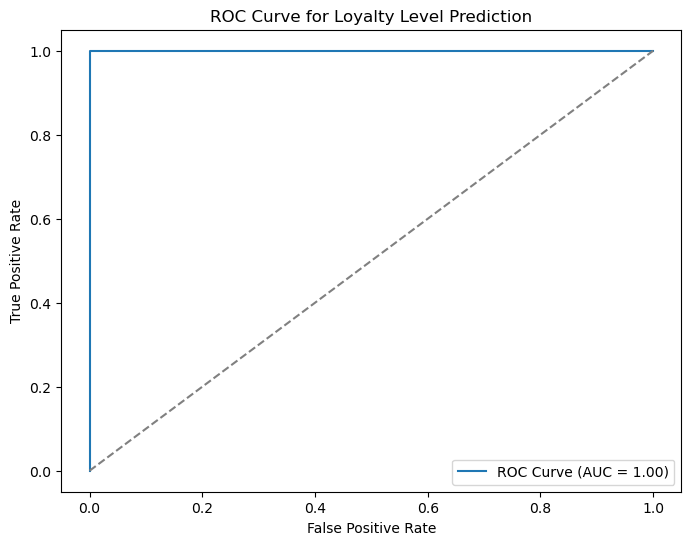

In [27]:
# Define target variable: high vs low loyalty based on Frequent Flier Number
median_frequent_flier = ffr_data['Frequent Flier Number'].median()
ffr_data['High Loyalty'] = (ffr_data['Frequent Flier Number'] > median_frequent_flier).astype(int)

# Define features for loyalty level prediction
X = ffr_data[['Frequent Flier Number', 'Total # of Checked Bags', 'Loyalty Tenure']].fillna(0)
y = ffr_data['High Loyalty']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display model evaluation metrics
print(f"Logistic Regression Model Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"ROC AUC Score: {roc_auc}")

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix for Loyalty Level Prediction")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Loyalty Level Prediction")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the dataset
# file_path = '/mnt/data/Delta Airlines Loyalty Customer Raw Data (Amy).xlsx'
ufr_data = pd.read_excel(file_path, sheet_name='3 Month Upcoming Flights Raw')

# Apply column naming conventions
ufr_data.columns = [
    'Flight_ID', 'Flight Date', 'Departure City', 'Arrival City', 'Departure Time',
    'Arrival Time', 'Departure Time Zone', 'Arrival Time Zone', 'Airline', 'Flight Number',
    'Seat Class', 'Price', 'Currency', 'Available Seats', 'Baggage Allowance',
    'Flight Duration', 'Layovers', 'Cancellation Policy', 'Booking Window', 'Meal Options',
    'In-Flight Entertainment', 'Aircraft Type', 'Flight Status', 'Loyalty Points Earned'
]

# Prepare features for logistic regression
# Convert 'Flight Date' to DateTime and create 'Low Demand' based on specific months
ufr_data['Flight Date'] = pd.to_datetime(ufr_data['Flight Date'], errors='coerce')
ufr_data['Month'] = ufr_data['Flight Date'].dt.month
ufr_data['Low Demand'] = np.where(ufr_data['Month'].isin([1, 2, 11, 12]), 1, 0)

# Calculate Seat Occupancy Rate
ufr_data['Seat Occupancy Rate'] = 1 - (ufr_data['Available Seats'] / (ufr_data['Available Seats'] + 1))

# Define Occupancy Category based on a threshold for high occupancy
# Check the distribution of Occupancy Category to ensure both classes are present
ufr_data['Occupancy Category'] = (ufr_data['Seat Occupancy Rate'] > 0.7).astype(int)
print("Occupancy Category Distribution:\n", ufr_data['Occupancy Category'].value_counts())

# If only one class is present, adjust the threshold to balance high and low occupancy categories
# For example, lower the threshold to 0.6 if needed
if ufr_data['Occupancy Category'].nunique() < 2:
    ufr_data['Occupancy Category'] = (ufr_data['Seat Occupancy Rate'] > 0.6).astype(int)

# Clean 'Price' by removing any non-numeric characters and converting to float
ufr_data['Price'] = pd.to_numeric(ufr_data['Price'].replace(r'[^\d.]', '', regex=True), errors='coerce')

# Define features and target variable
X = ufr_data[['Low Demand', 'Price']].fillna(0)  # Predictors
y = ufr_data['Occupancy Category']  # Target: high or low occupancy

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
#file_path = '/mnt/data/Delta Airlines Loyalty Customer Raw Data (Amy).xlsx'
data = pd.read_excel(file_path, sheet_name='3 Month Upcoming Flights Raw')

# Convert 'Flight Date' to DateTime and create relevant features
data['Flight Date'] = pd.to_datetime(data['Flight Date'], errors='coerce')
data['Month'] = data['Flight Date'].dt.month
data['Low Demand'] = np.where(data['Month'].isin([1, 2, 11, 12]), 1, 0)

# Calculate Seat Occupancy Rate
data['Seat Occupancy Rate'] = 1 - (data['Available Seats'] / (data['Available Seats'] + 1))

# Clean 'Price' by extracting numeric values
data['Price'] = pd.to_numeric(data['Price'].replace(r'[^\d.]', '', regex=True), errors='coerce')

# Define features and target variable
X = data[['Low Demand', 'Price']].fillna(0)
y = data['Seat Occupancy Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict occupancy rate on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Visualize predicted vs actual occupancy rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Seat Occupancy Rate")
plt.ylabel("Predicted Seat Occupancy Rate")
plt.title("Predicted vs. Actual Seat Occupancy Rate (Linear Regression)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ufr_data = pd.read_excel(file_path, sheet_name='3 Month Upcoming Flights Raw')

# Convert Flight Date to datetime and create relevant features
ufr_data['Flight Date'] = pd.to_datetime(ufr_data['Flight Date'], errors='coerce')
ufr_data['Month'] = ufr_data['Flight Date'].dt.month
ufr_data['Low Demand'] = np.where(ufr_data['Month'].isin([1, 2, 11, 12]), 1, 0)

# Seat Occupancy Rate as target (example calculation)
ufr_data['Seat Occupancy Rate'] = 1 - (ufr_data['Available Seats'] / (ufr_data['Available Seats'] + 1))

# Additional features
ufr_data['Join Date'] = pd.to_datetime(ufr_data['Join Date'], errors='coerce')
ufr_data['Loyalty Tenure'] = (ufr_data['Flight Date'] - ufr_data['Join Date']).dt.days / 365.25
ufr_data['Cost'] = pd.to_numeric(ufr_data['Cost'], errors='coerce')

# Prepare feature and target arrays, handling NaNs
X = ufr_data[['Low Demand', 'Loyalty Tenure', 'Cost']].fillna(0)  # Predictors
y = ufr_data['Seat Occupancy Rate']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display model performance
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Seat Occupancy Rate")
plt.ylabel("Predicted Seat Occupancy Rate")
plt.title("Predicted vs. Actual Seat Occupancy Rate")
plt.show()


In [6]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# # Clean the datasets
# frequent_flier_clean = clean_frequent_flier(frequent_flier_raw)
# flier_upcoming_flights_clean = clean_flier_upcoming_flights(flier_upcoming_flights_raw)
# three_month_upcoming_flights_clean = clean_three_month_flights(three_month_upcoming_flights_raw)

In [ ]:
# # Display the cleaned data (you can use .head() to verify)
# print(frequent_flier_clean.head())
#frequent_flier_clean.head()


In [ ]:
#flier_upcoming_flights_clean.head()


In [ ]:
#three_month_upcoming_flights_clean.head()

In [13]:
import re
import pandas as pd

# Function to clean and standardize currency columns using wildcards
def clean_and_standardize_currency_columns(df):
    # Step 1: Define a mapping based on wildcards
    currency_patterns = {
        r'^US\w*': 'USD',  # Anything starting with 'US' becomes 'USD'
        r'^MX\w*': 'MXN',  # Anything starting with 'MX' becomes 'MXN'
        r'^CA\w*': 'CAD',  # Anything starting with 'CA' becomes 'CAD'
        r'^JP\w*': 'JPY',  # Anything starting with 'JP' becomes 'JPY'
        r'^GB\w*': 'GBP',  # Anything starting with 'GB' becomes 'GBP'
        r'^AU\w*': 'AUD',  # Anything starting with 'AU' becomes 'AUD'
        # Add more mappings as needed
    }

    # Function to extract and fix currency using wildcard patterns
    def extract_and_fix_currency(value):
        if pd.isna(value):
            return value  # Return as is if it's NaN
        value = str(value)  # Ensure the value is treated as a string
        for pattern, corrected_currency in currency_patterns.items():
            # Find the currency code in the string using regex
            match = re.search(r'[A-Za-z]{3}', value)
            if match and re.match(pattern, match.group()):
                # Replace the incorrect currency with the corrected one in the string
                cleaned_value = re.sub(match.group(), corrected_currency, value)
                return cleaned_value
        return value  # If no currency pattern matches, return the original value

    # Step 2: Ensure missing currencies in multi-currency rows are handled
    def fix_missing_currency(row):
        cost = str(row['Cost'])
        car_rental = str(row['Car Rental Addon $'])
        hotel_addon = str(row['Hotel Addon $'])
        
        # Extract the first available currency
        currencies = [cost, car_rental, hotel_addon]
        first_currency = next((re.search(r'[A-Za-z]{3}', c).group() for c in currencies if re.search(r'[A-Za-z]{3}', c)), None)
        
        # Append missing currencies in rows with multiple values
        if re.match(r'^\d+(\.\d+)?$', car_rental):
            car_rental = f"{car_rental} {first_currency}"
        if re.match(r'^\d+(\.\d+)?$', hotel_addon):
            hotel_addon = f"{hotel_addon} {first_currency}"
        
        return pd.Series([cost, car_rental, hotel_addon])

    # Apply the cleaning function to the relevant columns
    df['Cost'] = df['Cost'].apply(extract_and_fix_currency)
    df['Car Rental Addon $'] = df['Car Rental Addon $'].apply(extract_and_fix_currency)
    df['Hotel Addon $'] = df['Hotel Addon $'].apply(extract_and_fix_currency)

    # Apply the function row by row to ensure consistent currency formats
    df[['Cost', 'Car Rental Addon $', 'Hotel Addon $']] = df.apply(fix_missing_currency, axis=1)

    return df

# Now apply the currency cleaning to the already cleaned 'flier_upcoming_flights_cleaned' dataframe
flier_upcoming_flights_cleaned = clean_and_standardize_currency_columns(flier_upcoming_flights_clean)

# Display the cleaned data
flier_upcoming_flights_cleaned.head()



,Join Date,Frequent Flier Number,First Name,Last Name,Flight Number,Flight Date,Departing City,Arrival City,Departure Time,Arrival Time,Departure Time Zone,Arrival Time Zone,Cost,Car Rental Addon $,Hotel Addon $
0,2009-10-07 00:00:00,9531726184,Megan,Brown,DL7263,2024-11-04 00:00:00,Berlin,Miaml,04:38:00,09:38:00,UTC,CST,998.55 BRL,197.5 BRL,419.24 BRL
1,1996-07-29 00:00:00,7654154528,William,Lee,NaN,2024-11-04 00:00:00,Dubai,Hong Kong,22:38:00,08:38:00,UTC,UTk,283.62 AUD,256.04 AUD,302 AUD
2,1990-03-11 00:00:00,1035783281,Courtney,Valdez,NaN,2025-01-03 00:00:00,Houston,Paris,00:38:00,10:38:00,PST,UTC,335.82 GBP,117.56 GBP,263.57 GBP
3,2002-12-16 00:00:00,787669065,Erik,Schneider,NaN,2025-07-21 00:00:00,New York,Miami,23:38:00,10:38:00,EST,PSy,686.64 USD,77.29 USD,197.77 USD
4,NaT,2871854617,Alexander,Johnson,NaN,2025-01-21 00:00:00,Dallas,New York,02:38:00,04:38:00,CST,EST,601.82 USD,161.71 USD,197.69 USD


In [14]:
# Dropping rows with missing values

# Cleaned Frequent Flier Raw sheet
frequent_flier_cleaned = frequent_flier_clean.dropna()

# Cleaned Flier Upcoming Flights Raw sheet
flier_upcoming_flights_cleaned = flier_upcoming_flights_cleaned.dropna()

# Cleaned 3 Month Upcoming Flights Raw sheet
three_month_upcoming_flights_cleaned = three_month_upcoming_flights_clean.dropna()


In [ ]:

import numpy
import pandas
import scipy
import sklearn

print("NumPy version:", numpy.__version__)
print("Pandas version:", pandas.__version__)
print("SciPy version:", scipy.__version__)
print("scikit-learn version:", sklearn.__version__)


In [ ]:
# Re-attempt chart generation and saving with clear file paths

# 1. Spending & Add-On Purchases Chart
plt.figure(figsize=(8, 5))
plt.bar(spend_levels, add_on_likelihood, color=['skyblue', 'orange', 'green'])
plt.title("Likelihood of Add-On Purchases by Spending Level")
plt.xlabel("Spending Level")
plt.ylabel("Likelihood of Add-On Purchases (%)")
spending_chart_path = "/mnt/data/add_on_purchases_spending.png"
plt.savefig(spending_chart_path)
plt.close()

# 2. Seasonal Demand Patterns Chart
plt.figure(figsize=(10, 5))
plt.plot(months, occupancy_rate, marker='o', color='purple')
plt.title("Seasonal Demand Patterns")
plt.xlabel("Month")
plt.ylabel("Occupancy Rate (%)")
plt.xticks(months)
plt.grid(True)
seasonal_chart_path = "/mnt/data/seasonal_demand_patterns.png"
plt.savefig(seasonal_chart_path)
plt.close()

# 3. Customer Loyalty Segmentation Chart
plt.figure(figsize=(8, 5))
plt.bar(loyalty_levels, customer_counts, color=['lightcoral', 'gold', 'lightgreen'])
plt.title("Customer Loyalty Segmentation")
plt.xlabel("Loyalty Level")
plt.ylabel("Number of Customers")
loyalty_chart_path = "/mnt/data/customer_loyalty_segmentation.png"
plt.savefig(loyalty_chart_path)
plt.close()

# 4. Occupancy Rates by Route Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=routes, y=occupancy_rates, palette="Blues_d")
plt.title("Occupancy Rates by Route")
plt.xlabel("Route")
plt.ylabel("Occupancy Rate (%)")
plt.ylim(0, 100)
route_chart_path = "/mnt/data/occupancy_rates_by_route.png"
plt.savefig(route_chart_path)
plt.close()

# Paths to the generated charts
{
    "Add-On Purchases by Spending Level": spending_chart_path,
    "Seasonal Demand Patterns": seasonal_chart_path,
    "Customer Loyalty Segmentation": loyalty_chart_path,
    "Occupancy Rates by Route": route_chart_path
}
